In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [305]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [307]:
df.duplicated().sum()

0

In [308]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [309]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [310]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [311]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [312]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [313]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [314]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [316]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [317]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [318]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [319]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [320]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 11)                132       
                                                                 
 dense_32 (Dense)            (None, 11)                132       
                                                                 
 dense_33 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [321]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [322]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=180,verbose=1,validation_split=0.2)

Epoch 1/180
128/128 [==============================] - 1s 4ms/step - loss: 0.6417 - accuracy: 0.6020 - val_loss: 0.5253 - val_accuracy: 0.7981
Epoch 2/180
128/128 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7958 - val_loss: 0.4687 - val_accuracy: 0.7975
Epoch 3/180
128/128 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7969 - val_loss: 0.4455 - val_accuracy: 0.8012
Epoch 4/180
128/128 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8011 - val_loss: 0.4318 - val_accuracy: 0.8031
Epoch 5/180
128/128 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8069 - val_loss: 0.4232 - val_accuracy: 0.8087
Epoch 6/180
128/128 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8145 - val_loss: 0.4157 - val_accuracy: 0.8194
Epoch 7/180
128/128 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8231 - val_loss: 0.4086 - val_accuracy: 0.8288

Epoch 58/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8609 - val_loss: 0.3547 - val_accuracy: 0.8525
Epoch 59/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8625 - val_loss: 0.3548 - val_accuracy: 0.8537
Epoch 60/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8608 - val_loss: 0.3551 - val_accuracy: 0.8550
Epoch 61/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8614 - val_loss: 0.3548 - val_accuracy: 0.8562
Epoch 62/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8622 - val_loss: 0.3548 - val_accuracy: 0.8550
Epoch 63/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8636 - val_loss: 0.3558 - val_accuracy: 0.8544
Epoch 64/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8617 - val_loss: 0.3549 - val_accuracy:

Epoch 115/180
128/128 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8653 - val_loss: 0.3552 - val_accuracy: 0.8550
Epoch 116/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8648 - val_loss: 0.3565 - val_accuracy: 0.8575
Epoch 117/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8666 - val_loss: 0.3545 - val_accuracy: 0.8587
Epoch 118/180
128/128 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8677 - val_loss: 0.3569 - val_accuracy: 0.8537
Epoch 119/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8645 - val_loss: 0.3557 - val_accuracy: 0.8569
Epoch 120/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8662 - val_loss: 0.3546 - val_accuracy: 0.8562
Epoch 121/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8667 - val_loss: 0.3551 - val_ac

128/128 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8670 - val_loss: 0.3554 - val_accuracy: 0.8594
Epoch 172/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8691 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 173/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8661 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 174/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8681 - val_loss: 0.3556 - val_accuracy: 0.8562
Epoch 175/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8678 - val_loss: 0.3546 - val_accuracy: 0.8600
Epoch 176/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8683 - val_loss: 0.3541 - val_accuracy: 0.8575
Epoch 177/180
128/128 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8692 - val_loss: 0.3560 - val_accuracy: 0.8594

In [323]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [324]:
y_pred=np.where(y_pred>0.5,1,0)

In [325]:
# y_pred = y_pred.argmax(axis=-1)

In [326]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

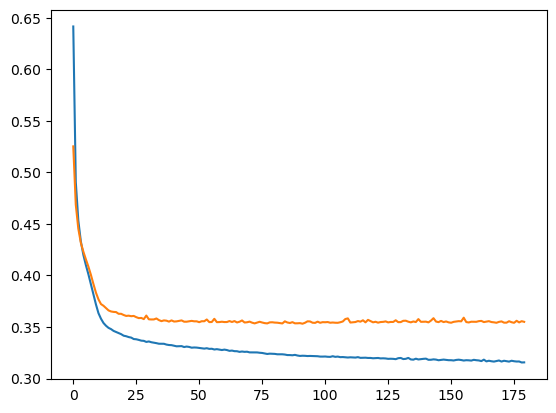

In [327]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

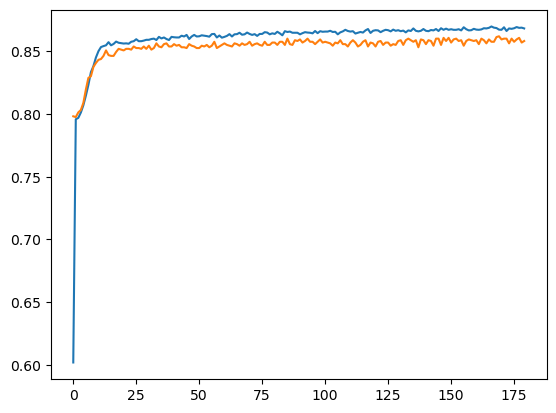

In [328]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])